In [1]:
from compute_otu_metrics import read_otu_table, read_taxonomy
from utilities import load_data
otu_taxonomy = read_taxonomy()
site_otu_table = read_otu_table()
site_metadata = load_data()

In [34]:
level = "PHYLUM" #in KINGDOM, PHYLUM, CLASS, ORDER, FAMILY, GENUS
otu_taxonomy[level] = otu_taxonomy[level].fillna(f"unclassified_{level}").astype(str)
otu_taxonomy[level] = otu_taxonomy[level].replace("Unknown", f"unclassified_{level}")

level_site_table = site_otu_table.groupby(otu_taxonomy[level], axis=1).sum() #group otus (otu_table columns) by tax_labels
level_site_table.head()

PHYLUM,Acidobacteria,Actinobacteria-p,AncK6,Aquificae-p,Armatimonadetes,Asgardaeota,Atribacteria,BHI80-139,BRC1,Bacteroidetes,...,Thaumarchaeota,Thermosulfidibacteraeota,Thermotogae-p,Verrucomicrobia,WPS-2,WS1,WS2,WS4,Zixibacteria,unclassified_PHYLUM
id_site,,,,,,,,,,,,,,,,,,,,,
6,518,774,0,0,15,0,0,0,0,1811,...,1899,0,0,41,0,0,0,0,0,95
7,574,742,0,0,18,0,0,0,1,1946,...,1139,0,0,46,0,0,0,0,0,21
9,592,778,0,0,23,0,0,0,3,1398,...,1479,0,0,39,0,0,0,0,0,69
10,942,1237,0,0,19,0,0,0,12,1060,...,1126,0,0,37,0,0,0,0,0,18
11,447,577,0,0,7,0,0,0,14,1862,...,53,0,0,127,0,0,0,0,0,83


In [35]:
#group sites (otu_table rows) by land_use
level_land_use_table = level_site_table.groupby(site_metadata['land_use'], axis=0).mean()
#in index column, add the count of land use values as a suffix
level_land_use_table.index = [f"{idx}_{site_metadata['land_use'].value_counts()[idx]}_sites" for idx in level_land_use_table.index]
#same for columns headers, add count of sites as suffix
level_land_use_table.columns = [f"{col}_{(level_site_table[col] > 0).sum()}_sites" for col in level_land_use_table.columns]
#drop columns with less than 100 sites
level_land_use_table = level_land_use_table.loc[:, [col for col in level_land_use_table.columns if int(col.split('_')[-2]) >= 100]]
#convert to percentages of max abundance
level_land_use_table = level_land_use_table.div(level_land_use_table.max(axis=0), axis=1) * 100

level_land_use_table.head()

,Acidobacteria_1842_sites,Actinobacteria-p_1842_sites,Armatimonadetes_1825_sites,Atribacteria_548_sites,BRC1_1175_sites,Bacteroidetes_1842_sites,Calditrichaeota_253_sites,Chlamydiae-p_439_sites,Chloroflexi_1842_sites,Cyanobacteria_1823_sites,...,Rokubacteria_1837_sites,Spirochaetes_1220_sites,Synergistetes_295_sites,Tenericutes_1294_sites,Thaumarchaeota_1841_sites,Verrucomicrobia_1842_sites,WPS-2_798_sites,WS2_111_sites,WS4_126_sites,unclassified_PHYLUM_1837_sites
annual crops_743_sites,46.567070,71.673230,90.757171,73.428069,100.000000,96.984316,14.236578,52.991019,75.988330,100.000000,...,77.719320,14.228033,7.363081,67.866022,92.145779,61.874045,7.451537,59.353970,81.986541,23.421771
broadleaved forests_277_sites,92.381500,82.899024,41.036845,97.734269,25.669423,68.494756,9.733922,100.000000,50.881613,23.611094,...,72.902308,60.526044,29.236323,17.215014,20.030048,100.000000,54.283646,32.851986,18.137184,62.107384
coniferous forests_224_sites,100.000000,93.197419,43.820311,100.000000,24.431404,64.821600,8.333333,64.552448,49.288595,19.929659,...,85.714286,92.423469,69.423077,20.742358,17.635890,66.287244,100.000000,53.125000,11.214286,100.000000
meadows_471_sites,55.236749,88.827294,49.484789,63.313925,64.711207,75.196887,13.944589,41.426645,67.312155,38.489545,...,74.672843,22.347589,15.639392,89.457533,56.798713,85.064046,12.656131,34.182590,100.000000,26.231622
natural sites_56_sites,67.368367,100.000000,59.664432,24.539877,42.799539,77.184699,100.000000,77.774034,93.128324,35.650398,...,100.000000,100.000000,100.000000,100.000000,35.341462,87.964028,42.069287,87.500000,0.000000,41.848923


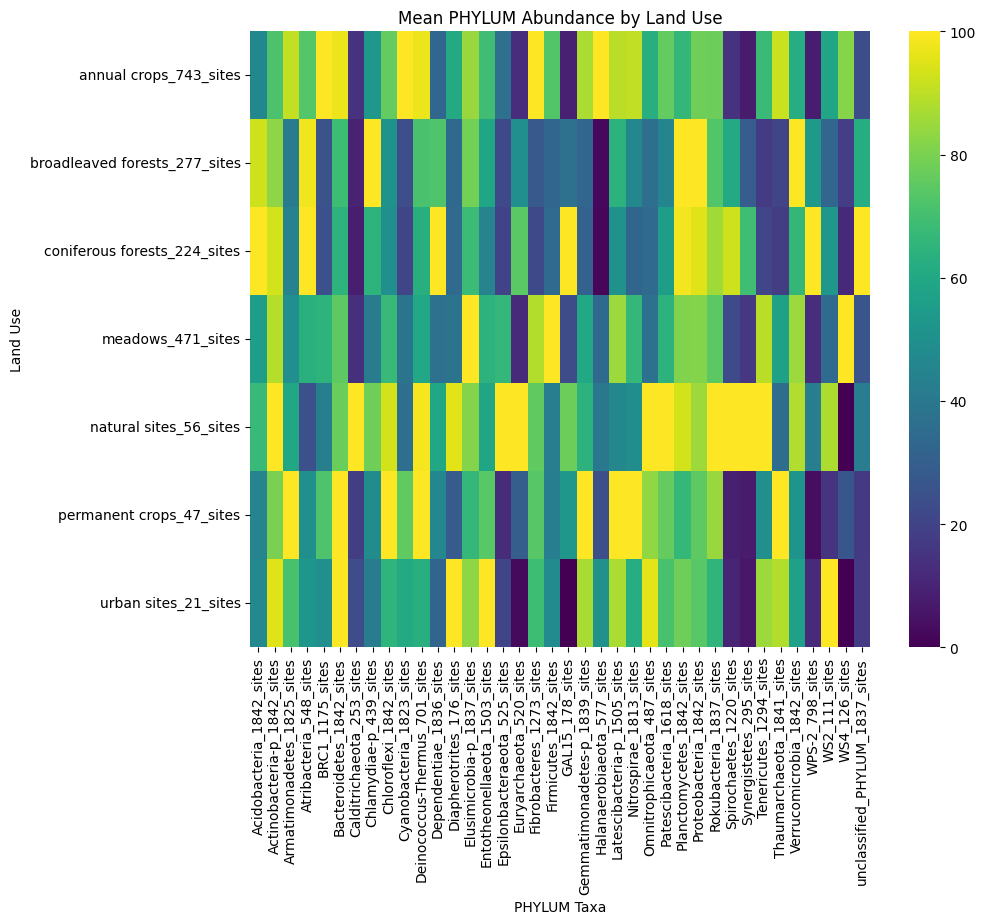

In [36]:
#plot the level_land_use_table in a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(level_land_use_table, cmap="viridis")
plt.title(f'Mean {level} Abundance by Land Use')
plt.xlabel(f'{level} Taxa')
plt.ylabel('Land Use')
plt.show()

True